Best Parameters: {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


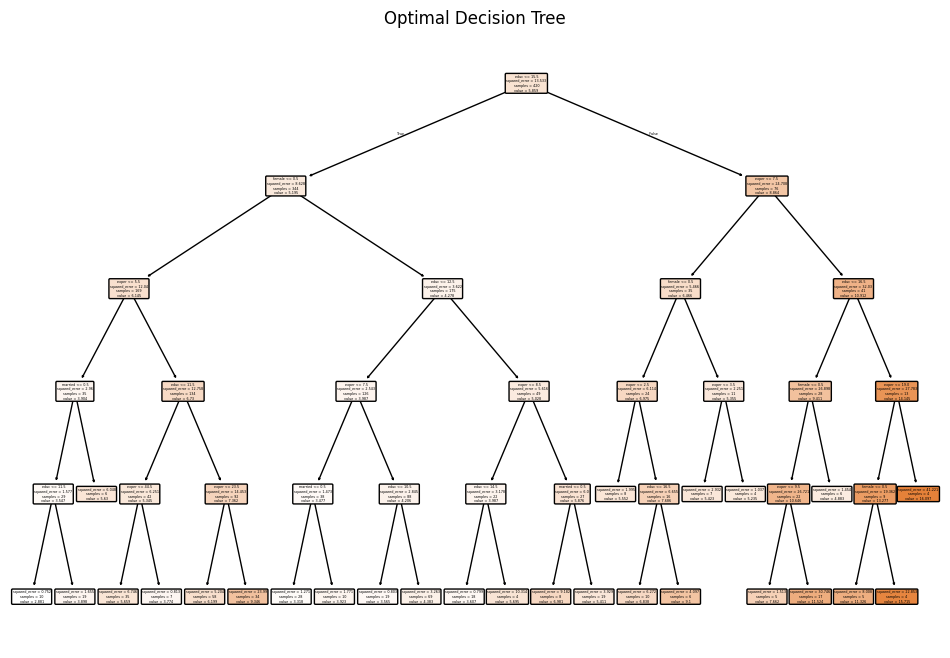

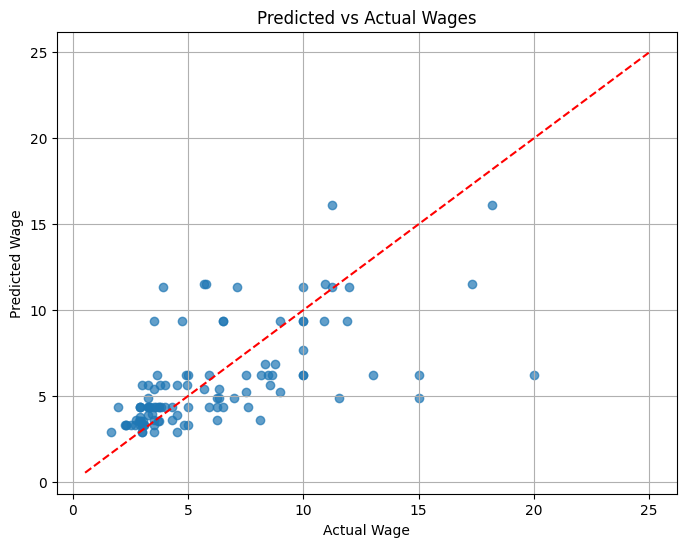

Mean Squared Error: 9.0878
R² Score: 0.3463


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wooldridge import data
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

df = data('wage1')

X = df[['educ', 'exper', 'female', 'married']]
y = df['wage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'friedman_mse']
}

tree = DecisionTreeRegressor(random_state=42)
grid = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


best_tree = grid.best_estimator_
plt.figure(figsize=(12, 8))
plot_tree(best_tree, feature_names=X.columns, filled=True, rounded=True)
plt.title("Optimal Decision Tree")
plt.show()

y_pred = best_tree.predict(X_test)


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Perfect prediction line
plt.xlabel("Actual Wage")
plt.ylabel("Predicted Wage")
plt.title("Predicted vs Actual Wages")
plt.grid(True)
plt.show()


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Best Parameters (Random Forest): {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


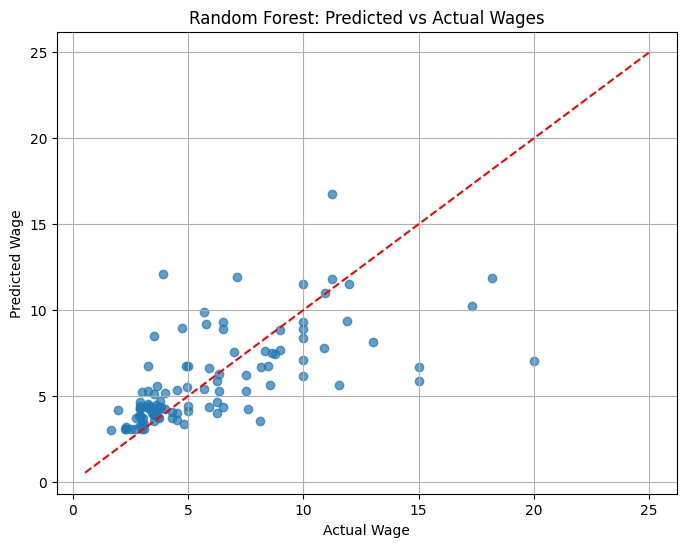

Random Forest MSE: 8.1912
Random Forest R²: 0.4108


In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wooldridge import data
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


df = data('wage1')
X = df[['educ', 'exper', 'female', 'married']]
y = df['wage']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_rf.fit(X_train, y_train)

print("Best Parameters (Random Forest):", grid_rf.best_params_)


best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Wage")
plt.ylabel("Predicted Wage")
plt.title("Random Forest: Predicted vs Actual Wages")
plt.grid(True)
plt.show()


print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred_rf):.4f}")
print(f"Random Forest R²: {r2_score(y_test, y_pred_rf):.4f}")


Best Parameters (XGBoost): {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


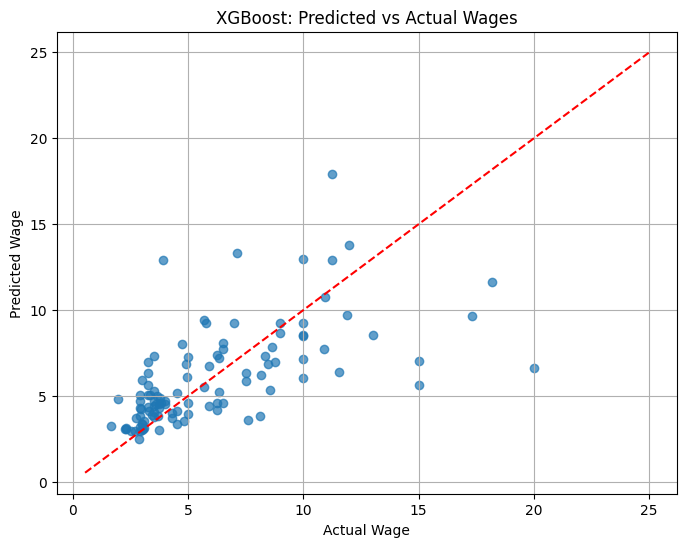

XGBoost MSE: 8.8467
XGBoost R²: 0.3636


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wooldridge import data
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

df = data('wage1')
X = df[['educ', 'exper', 'female', 'married']]
y = df['wage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1]
}

xgb = XGBRegressor(random_state=42, objective='reg:squarederror')
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='neg_mean_squared_error')
grid_xgb.fit(X_train, y_train)

print("Best Parameters (XGBoost):", grid_xgb.best_params_)

best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Wage")
plt.ylabel("Predicted Wage")
plt.title("XGBoost: Predicted vs Actual Wages")
plt.grid(True)
plt.show()

print(f"XGBoost MSE: {mean_squared_error(y_test, y_pred_xgb):.4f}")
print(f"XGBoost R²: {r2_score(y_test, y_pred_xgb):.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 60
[LightGBM] [Info] Number of data points in the train set: 336, number of used features: 4
[LightGBM] [Info] Start training from score 5.819881
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

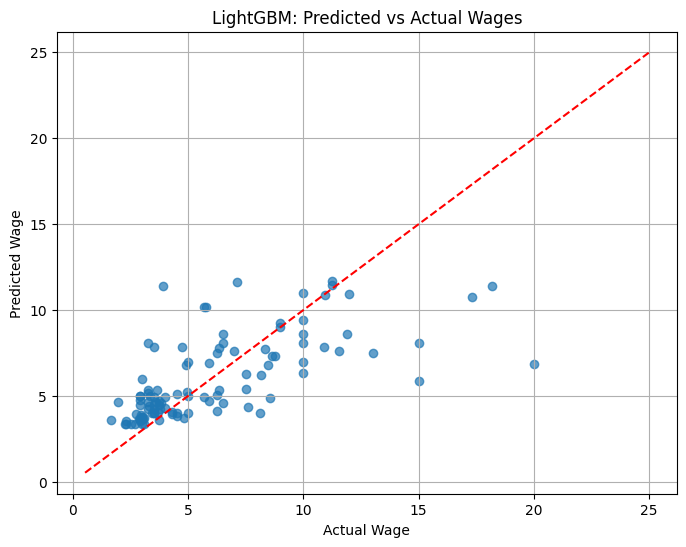

LightGBM MSE: 7.7636
LightGBM R²: 0.4415


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wooldridge import data
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMRegressor

df = data('wage1')
X = df[['educ', 'exper', 'female', 'married']]
y = df['wage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid_lgb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

lgbm = LGBMRegressor(random_state=42)
grid_lgb = GridSearchCV(lgbm, param_grid_lgb, cv=5, scoring='neg_mean_squared_error')
grid_lgb.fit(X_train, y_train)

print("Best Parameters (LightGBM):", grid_lgb.best_params_)

best_lgb = grid_lgb.best_estimator_
y_pred_lgb = best_lgb.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lgb, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Wage")
plt.ylabel("Predicted Wage")
plt.title("LightGBM: Predicted vs Actual Wages")
plt.grid(True)
plt.show()

print(f"LightGBM MSE: {mean_squared_error(y_test, y_pred_lgb):.4f}")
print(f"LightGBM R²: {r2_score(y_test, y_pred_lgb):.4f}")


In [ ]:
import pandas as pd
import numpy as np
from wooldridge import data
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score


df = data('wage1')
X = df[['educ', 'exper', 'female', 'married']]
y = df['wage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


results = []


def evaluate_model(name, model, param_grid):
    grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'MSE': mse, 'R²': r2})


evaluate_model('Decision Tree', DecisionTreeRegressor(random_state=42), {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'criterion': ['squared_error']
})


evaluate_model('Random Forest', RandomForestRegressor(random_state=42), {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
})


evaluate_model('XGBoost', XGBRegressor(random_state=42, objective='reg:squarederror'), {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
})


evaluate_model('LightGBM', LGBMRegressor(random_state=42), {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
})


results_df = pd.DataFrame(results).sort_values(by='MSE')
print(results_df)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 60
[LightGBM] [Info] Number of data points in the train set: 336, number of used features: 4
[LightGBM] [Info] Start training from score 5.819881
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

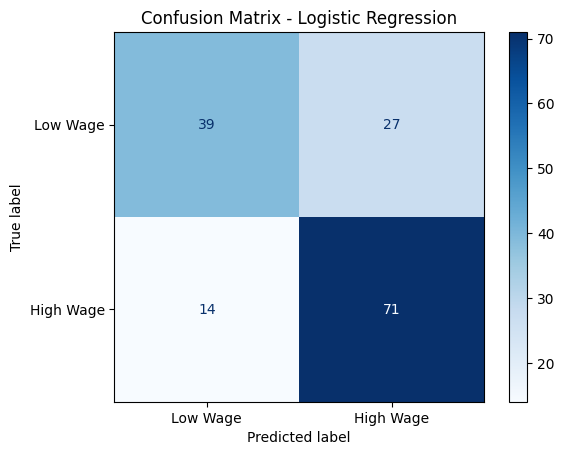

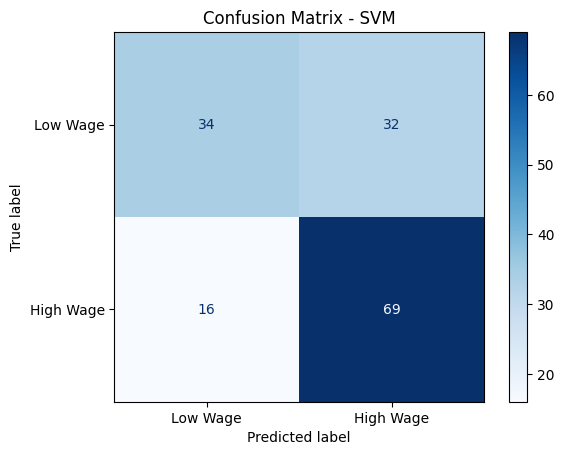

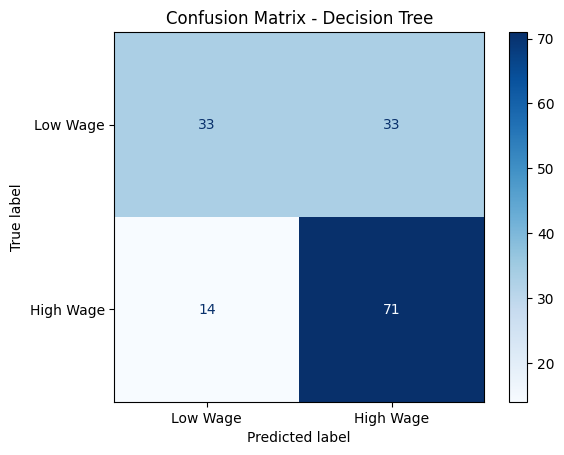

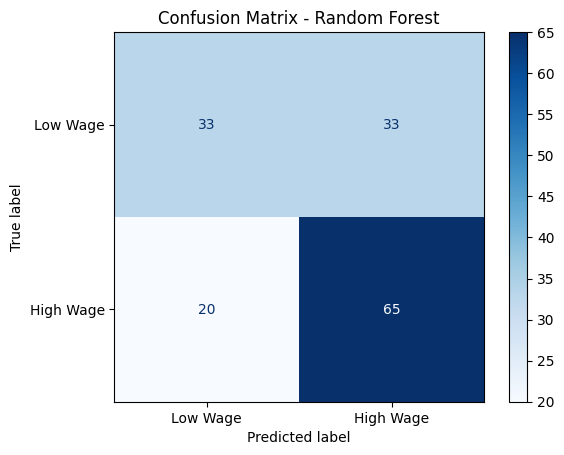

/Users/carlosortiz/econ_pizza_macro/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:47:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/carlosortiz/econ_pizza_macro/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:47:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/carlosortiz/econ_pizza_macro/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:47:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/carlosortiz/econ_pizza_macro/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:47:49] WARNING: /Users/runner/work/xgboost/xgboost/

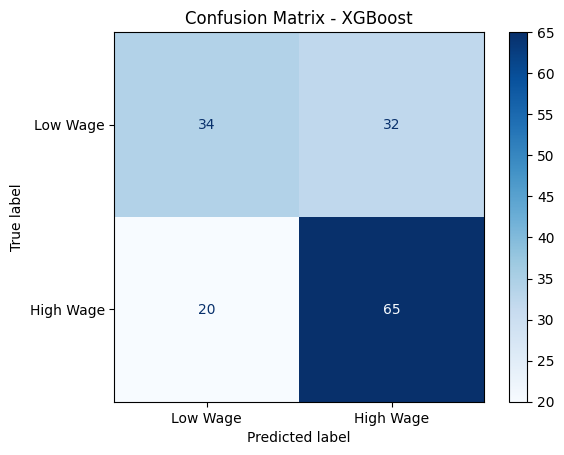

[LightGBM] [Info] Number of positive: 274, number of negative: 207
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 481, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.569647 -> initscore=0.280409
[LightGBM] [Info] Start training from score 0.280409
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

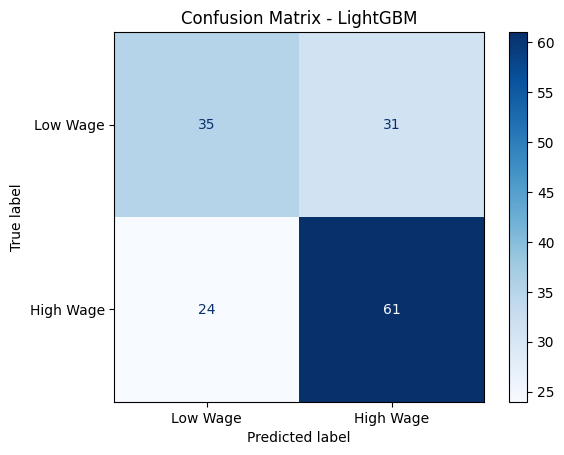


📊 Classification Model Comparison:

                 Model  Accuracy
0  Logistic Regression  0.728477
2        Decision Tree  0.688742
1                  SVM  0.682119
4              XGBoost  0.655629
3        Random Forest  0.649007
5             LightGBM  0.635762


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wooldridge import data
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load and preprocess data
df = data('mroz')
X = df[['educ', 'exper', 'huswage']]
y = df['inlf']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Store results
results = []

# Helper function
def evaluate_classifier(name, model, param_grid):
    grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results.append({'Model': name, 'Accuracy': acc})
    
    # Confusion matrix plot
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low Wage', 'High Wage'])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# Logistic Regression
evaluate_classifier("Logistic Regression", LogisticRegression(max_iter=1000), {
    'C': [0.1, 1, 10]
})

# SVM
evaluate_classifier("SVM", SVC(), {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
})

# Decision Tree
evaluate_classifier("Decision Tree", DecisionTreeClassifier(random_state=42), {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4]
})

# Random Forest
evaluate_classifier("Random Forest", RandomForestClassifier(random_state=42), {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'min_samples_leaf': [1, 2]
})

# XGBoost
evaluate_classifier("XGBoost", XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
})

# LightGBM
evaluate_classifier("LightGBM", LGBMClassifier(random_state=42), {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
})

# Show final results
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print("\n📊 Classification Model Comparison:\n")
print(results_df)
